# Single neuron ANN: logistic regression

## Import the external libraries

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline


## Data Preparation

### Load the datasets

In [2]:
def loadDataset():
	# Train Dataset
	TrainDataset = h5py.File(name="datasets/train_catvnoncat.h5", mode="r")
	X_train = np.array(object=TrainDataset["train_set_x"][:])
	Y_train = np.array(object=TrainDataset["train_set_y"][:])

	# Test Dataset
	TestDataset = h5py.File(name="datasets/test_catvnoncat.h5", mode="r")
	X_test = np.array(object=TestDataset["test_set_x"][:])
	Y_test = np.array(object=TestDataset["test_set_y"][:])

	# classes
	classes = np.array(object=TestDataset["list_classes"][:])

	return X_train, Y_train, X_test,Y_test, classes

X_train, Y_train, X_test,Y_test, classes = loadDataset()

### Reshape the data

In [3]:
def reshape(xtrain: X_train, ytrain: Y_train, xtest:X_test, ytest: Y_test):
	m_train, num_px, num_px, channels = xtrain.shape
	m_test, num_px, num_px, channels = xtest.shape
	feature_size = num_px*num_px*channels

	xtrain = xtrain.reshape(m_train, feature_size)
	ytrain = ytrain.reshape(m_train, 1)
	xtest = xtest.reshape(m_test, feature_size)
	ytest = ytest.reshape(m_test, 1)

	xtrain = xtrain.T/255
	ytrain = ytrain.T
	xtest = xtest.T/255
	ytest = ytest.T

	assert(xtrain.shape == (feature_size, m_train))
	assert(ytrain.shape == (1, m_train))
	assert(xtest.shape == (feature_size, m_test))
	assert(ytest.shape == (1, m_test))

	return xtrain, ytrain, xtest,ytest

X_train, Y_train, X_test,Y_test, classes = loadDataset()
X_train, Y_train, X_test,Y_test = reshape(xtrain= X_train, ytrain= Y_train, xtest=X_test, ytest= Y_test)
M_TRAIN = X_train.shape[1]
M_TEST = X_test.shape[1]
FEATURES = X_test.shape[0]

## Model Training

### Helper functions

In [4]:
def sigmoid(x):
	'''
	Input: a scalar or Numpy Array 
	 
	Output: the Sigmoid of the scalar/Array
	'''
	
	return 1/(1+np.exp(-x))

def lossFunction(y, yhat):
	''' 
	Return the negative log likelihood.

	Input: two scalar or two Numpy Array (of the same dimension)
	 
	Output: the negative log likelihood of the/these samples
	'''
	if 0 or 1 in yhat:
		print("problem with yhat")
		print(yhat)
	NLL = -(y*(np.log(yhat)) + (1-y)*np.log(1-yhat))
	NLL = np.reshape(a=NLL, newshape=(1, -1))
	return NLL

def costFunction(NLL):
	'''
	Input: Numpy Array of the negative log likelihood for a batch 
	
	Output: a Scalar, the total cost
	'''
	m = NLL.shape[1]
	cost = 1/m*np.sum(a=NLL, axis=1, keepdims=False)[0]
	return float(cost)

def printLoss(lossHistory):
	costs = np.squeeze(lossHistory)
	plt.plot(costs)
	plt.ylabel('cost')
	plt.xlabel('iterations')
	plt.show()

### Instanciate the Neural Network

In [5]:
def instanciate(features = FEATURES):
	'''
	instantiate the parameters for one neuron with a specified number of parameters

	Input: number of features

	Output:
		- W: weight [features, 1]
		- B: bias, scalar
	'''
	
	W = np.zeros(shape=(features, 1), dtype=np.float16)
	B = 0.
	
	return W, B

### Forward pass

In [6]:
def forward(X, Y, W, B):
	'''
	Make a forward pass.
	Input:
		X = Features [features, m]
		Y = True values [1,m]
		W = Parameters [features,1]
		B = Bias

	Output: 
		A = logits (prediction)
		J = Cost of this pass
		dw = gradients of parameters
		db = gradient of bias
	'''
	features, m = X.shape
	assert(W.shape == (features, 1))

	Z = W.T@X + B # [1, m] 
	A = sigmoid(Z) # [1, m], logits
	L = lossFunction(y=Y, yhat=A) # [1, m]
	
	assert(L.shape == (1,m))
	J = costFunction(L) # scalar
	
	dw = 1/m*X@(A-Y).T # [features, 1], gradients of W
	assert(dw.shape == W.shape)
	
	db = float(1/m*(np.sum(a=(A-Y),axis= 1, keepdims=False))[0]) # scalar, gradient of B
	assert(type(db) == float)
	
	return A, J, dw, db

### Backward pass

In [7]:
def backward(W, B, dw, db, learningRate = 0.01):
	'''
	Update W and B according to the chosen learning rate

	Input:
		- W = weights
		- B = Bias
		- dw = Gradients of W
		- db = Gradient of B
	
	Output:
		- W = W updated
		- B = B updated 
	'''
	W -= learningRate*dw
	B -= learningRate*db

	return W, B

### Gradient descent

In [8]:
def gradientDescent(X, Y, W, B, learningRate = 0.01, epoch = 2000, printCost = True):
	'''
	Perform gradient descent for the number of specified epochs.
	
	Inputs:
		- X: training set [features, m]
		- Y: labels []
		- W: weights
		- B: bias
		- learningRate: the chosen learning rate

	Outputs:
		- W: the final weights
		- B: the final bias
		- cost: the history of the cost function
	'''
	cost = []
	for i in range(epoch):
		A, J, dw, db = forward(X, Y, W, B)
		W, B = backward(W, B, dw, db, learningRate)
		cost.append(J)
	
		if i%100 == 0 and printCost:
			print(J)

	return W, B, cost

### Create and train the model

0.6931471805599453
0.5845071023165105
0.46695781440537376
0.3760236771454751
0.33146112253094745
0.3031976002277628
0.2800997648915012
0.2606603211577743
0.24370077267329615
0.22839157922379327
0.21421649463014164
0.2010838922055257
0.18911837269936613
0.17851661039173305
0.1694385837463483
0.16188769219470167
0.15575861800767876
0.1509913014187976
0.14744770323466314
0.14505606180850097


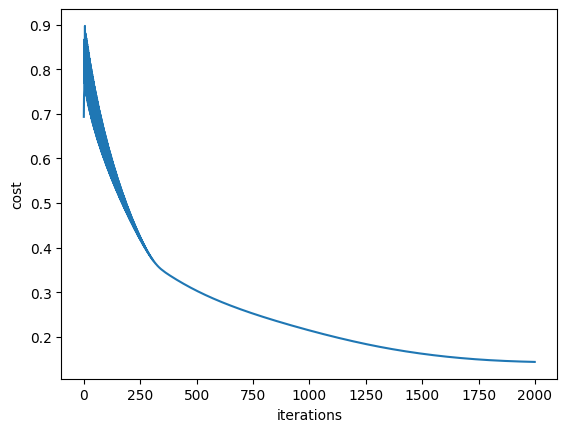

In [9]:
def model(features = FEATURES, learningRate = 0.0001, epoch = 1000, printCost=True):
	W, B = instanciate(features=FEATURES)
	W, B, cost = gradientDescent(X_train, Y_train,W, B, learningRate, epoch, printCost)
	if printCost:
		printLoss(cost)
	return [W, B], cost

MODEL = model(features=FEATURES, learningRate=0.005, epoch=2000, printCost=True)
PARAMETERS = MODEL[0]
TRAINING_HISTORY = MODEL[1]

## Make prediction

In [10]:
def predict(model, X, Y):
	W, B = model[0]
	Z = W.T@X+B
	logits = sigmoid(Z)
	yhat = ((logits-0.5)>0).astype(np.int8)
	accuracy = 100 - np.mean(np.abs(yhat-Y))*100
	return yhat, accuracy

yhat_train, accuracy_train = predict(MODEL, X_train, Y_train)
yhat_test, accuracy_test = predict(MODEL, X_test, Y_test)
print(f"the train accuracy = {accuracy_train}\nthe test accuracy = {accuracy_test}")

the train accuracy = 99.04306220095694
the test accuracy = 70.0
